## Visualization

### DATA Analysis Visualization of exploratory, general and medal factors, medal count of male and female, distribution over time(from the start)
### Atheletics
### Year and Number of competitors
### Years and number of countries
### Number of medals and Noc
### https://towardsdatascience.com/120-years-of-olympic-history-analysis-cba815736ea9
### Check up on the Visualizations new ones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

## Importing data of olympic

In [2]:
## Importing data of olympic

athlete_data_raw = pd.read_csv ("athlete_events.csv")
noc_data = pd.read_csv ("noc_regions.csv")
athlete_data = pd.merge (athlete_data_raw, noc_data, on= "NOC", how= "left")
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:
noc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [4]:
athlete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


## Extracting Athletics data from big data

In [5]:
##Extracting Athletics data from big data

Athletics = pd.DataFrame(athlete_data[athlete_data['Sport']=='Athletics'])
print("Athletics Data Dimension:",Athletics.shape)
print("Type:",type(Athletics))
Athletics.head()

Athletics Data Dimension: (38624, 17)
Type: <class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN,Estonia,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN,Norway,NaN


## Clearing duplicates as an athelete can compete in mulitple olympics within the years.

In [6]:
##Clearing duplicates as an athelete can compete in mulitple olympics within the years.

Athletics_nonDup = pd.DataFrame(athlete_data.drop_duplicates(subset = ["Name", "Age"], keep = "first"))
Athletics_nonDup.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
Athletics_nonDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186960 entries, 0 to 271115
Data columns (total 17 columns):
ID        186960 non-null int64
Name      186960 non-null object
Sex       186960 non-null object
Age       180604 non-null float64
Height    148410 non-null float64
Weight    147061 non-null float64
Team      186960 non-null object
NOC       186960 non-null object
Games     186960 non-null object
Year      186960 non-null int64
Season    186960 non-null object
City      186960 non-null object
Sport     186960 non-null object
Event     186960 non-null object
Medal     28495 non-null object
region    186722 non-null object
notes     3340 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 25.7+ MB


In [8]:
Athletics_nonDup['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

## Comparing general data of the number of ahteletes competing in the different years of the olympics.

Text(0, 0.5, 'count')

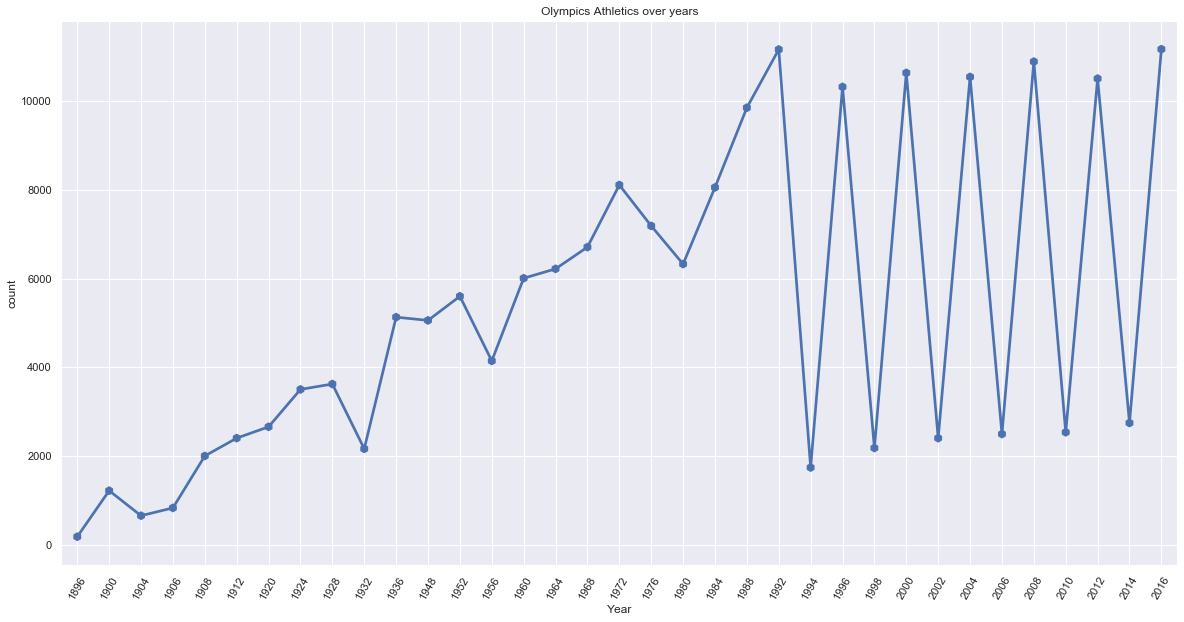

In [9]:
##Comparing general data of the number of ahteletes competing in the different years of the olympics.

Athletics_Year = Athletics_nonDup.groupby('Year')['ID'].nunique().reset_index()

fig = plt.figure(figsize=(20, 10))
sb.pointplot(x = Athletics_Year['Year'],y=Athletics_Year['ID'],markers="h")
plt.xticks(rotation = 60)
plt.grid(True ,alpha=1)
plt.title('Olympics Athletics over years')
plt.ylabel('count')

## Extracting the different regions that participated in the olympics.

In [10]:
##Extracting the different regions that participated in the olympics.

Athletics_nonDup['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka',
       'Armenia', 'Ivory

In [18]:
Athletics_nonDup['region'].describe()

##Total 205 unique regions

count     186722
unique       205
top          USA
freq       12848
Name: region, dtype: object

## Total 205 unique regions

## Plotting the visualisations of the different regions taking part in the olmypics as the years progresses.

Text(0.5, 1, 'Olympics Athletics over years')

<Figure size 4320x3600 with 0 Axes>

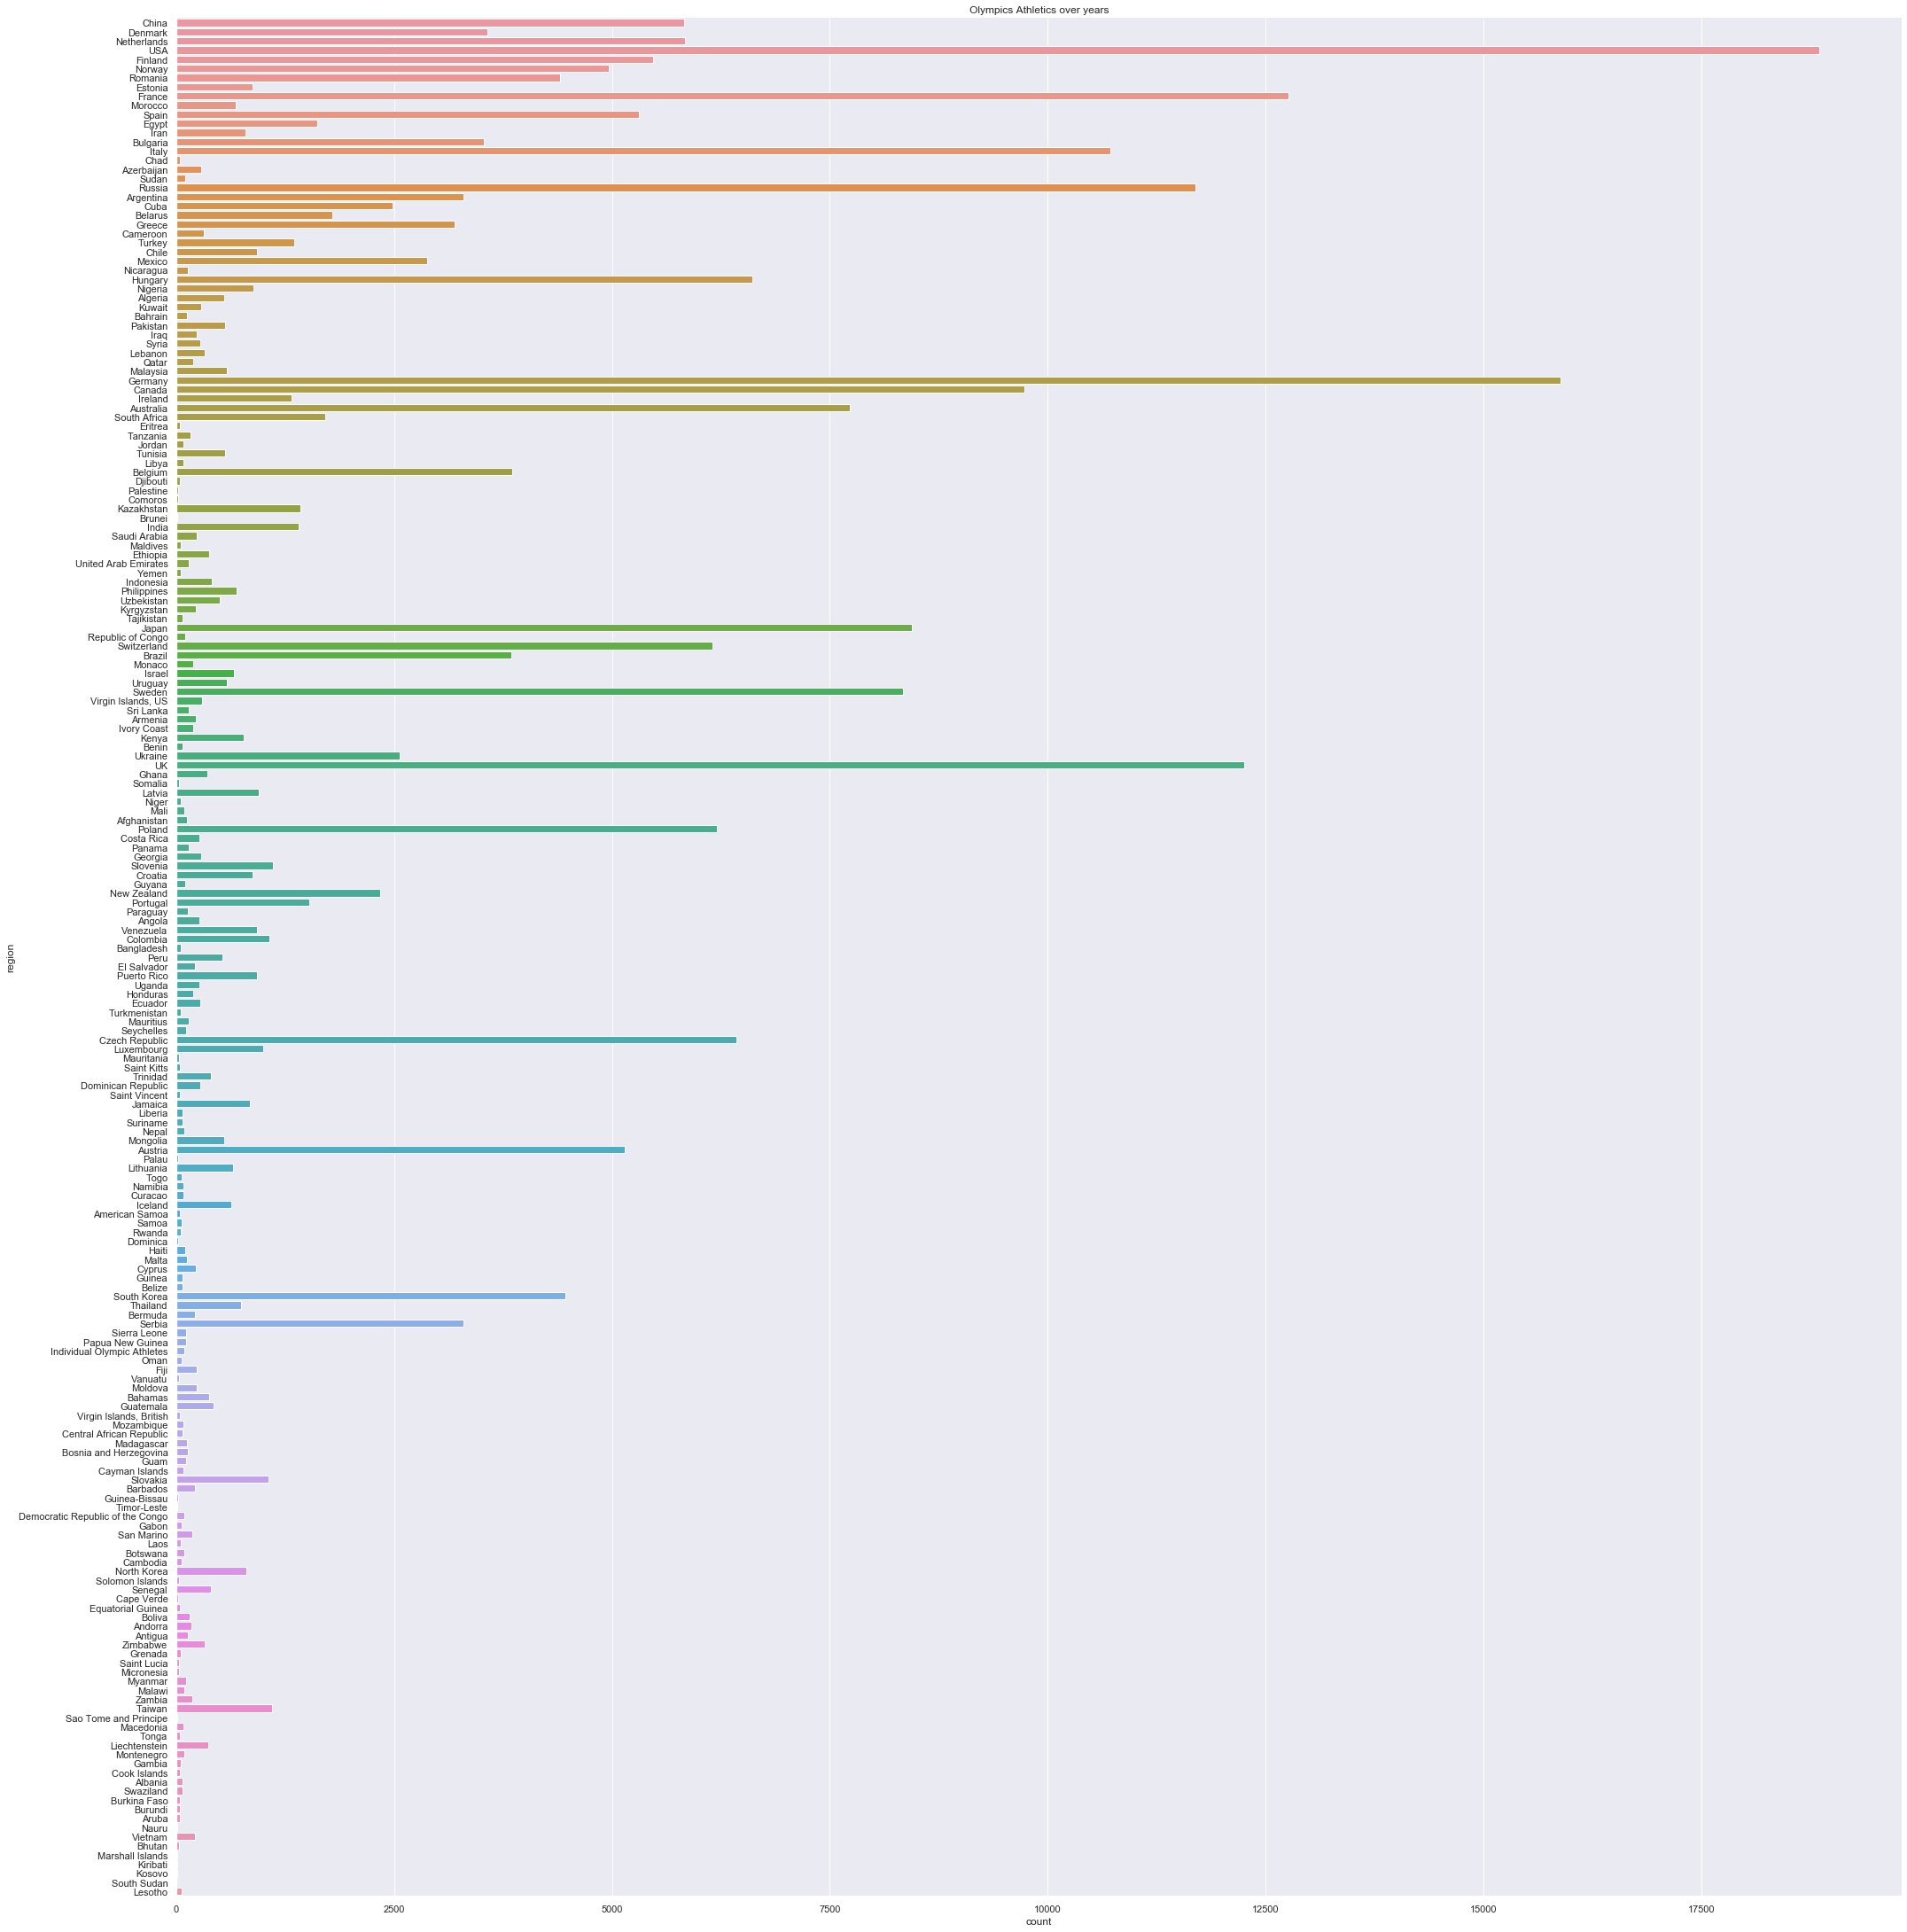

In [11]:
##PLotting the visualisations of the different regions taking part in the olmypics as the years progresses.

plt.figure(figsize=(60,50))
Athletics_Region = Athletics_nonDup.groupby('region')['Year'].unique().reset_index()
sb.catplot(y = "region", data = athlete_data, kind = "count", height = 30)
plt.ylabel('region')
plt.title('Olympics Athletics over years')

## Plotting the visualizations of the number of NOC participating in the different years of olympics.

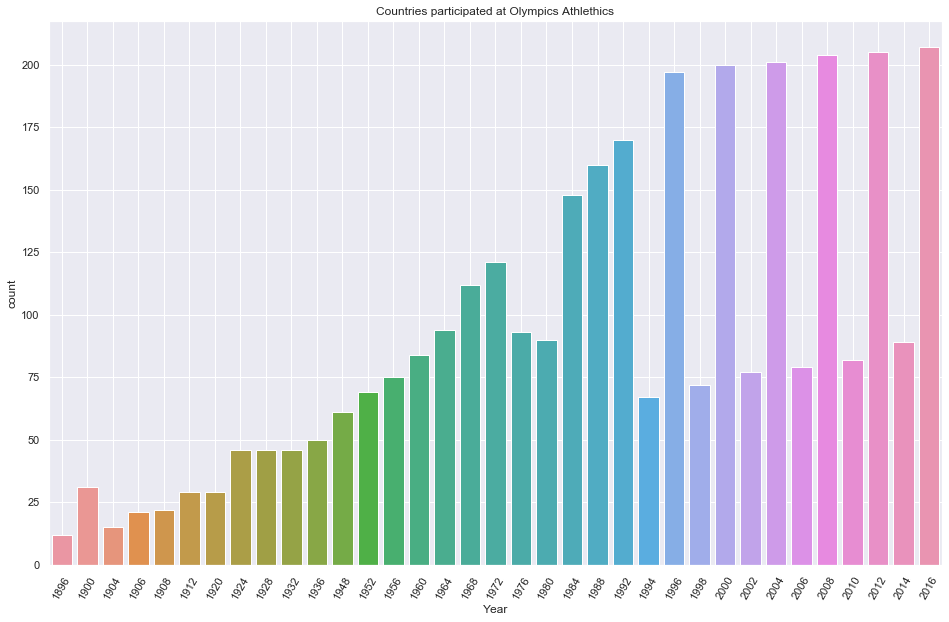

In [13]:
##Plotting the visualizations of the number of NOC participating in the different years of olympics.

plt.figure(figsize=(16,10))
country_c = Athletics_nonDup.groupby('Year')['NOC'].nunique().reset_index()

sb.barplot(x='Year',y='NOC',data=country_c)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('Countries participated at Olympics Athlethics')
plt.grid(True,alpha =1)

In [14]:
Athletics_Medals = Athletics_nonDup.groupby('Medal')['NOC'].nunique().reset_index()

## Plotting the visualizations of number of medals and number of NOC.

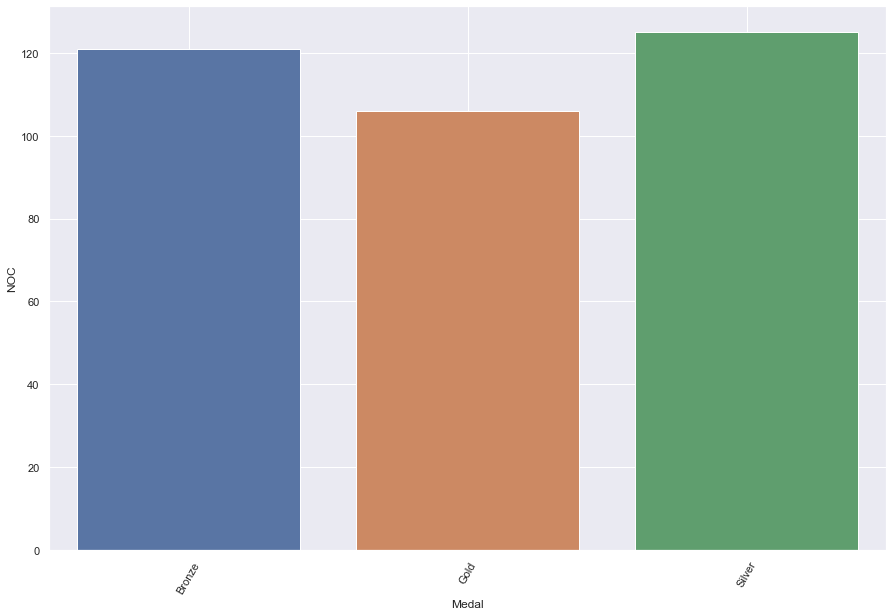

In [15]:
## Plotting the visualizations of number of medals and number of NOC.

plt.figure(figsize=(15,10))
medal_m = Athletics_nonDup.groupby('Medal')['NOC'].nunique().reset_index()

sb.barplot(x='Medal',y='NOC',data=medal_m)
plt.xticks(rotation = 60)
plt.ylabel('NOC')
plt.grid(True,alpha =1)